# <center>Sprawozdanie z Laboratorium 5<br>Metody Numeryczne<br> Mikołaj Ogarek grupa 4b Informatyka WEAIiIB rok 2</center>

***Zadanie 1***   


Dla i=1:<br>
x=1, y=1. <br>
Dla i=2: <br>
x=2, y=0. 

Pomimo niewielkiej zmiany w wektorze prawych strony, rozwiązanie zmienia się znacznie.

Obliczam współczynnik uwarunkowania macierzy korzystając z 3 norm: 

In [1]:
from numpy import linalg as LA
import numpy as np

a=[[1,1],[1,1.0001]]

#norma kolumnowa
print(LA.cond(a,1))

#norma spektralna
print(LA.cond(a,2))

#norma wierszowa
print(LA.cond(a,np.inf))

40004.0001000044
40002.000074915224
40004.0001000044


***Zadanie 2***  


In [2]:
def zrob_mi_Hilberta(i,j):
    arr=[]
    x=[]
    for a in range(1,i+1):
        for b in range(1,j+1):
            x.append(1/(a+b-1))
        arr.append(x)
        x=[]
            
    return arr

mat=zrob_mi_Hilberta(8,8)
print(mat)

#norma kolumnowa
print(LA.cond(mat,1))

#norma spektralna
print(LA.cond(mat,2))

#norma wierszowa
print(LA.cond(mat,np.inf))

[[1.0, 0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125], [0.5, 0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111], [0.3333333333333333, 0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1], [0.25, 0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091], [0.2, 0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333], [0.16666666666666666, 0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693], [0.14285714285714285, 0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142], [0.125, 0.1111111111111111, 0.1, 0.09090909090909091, 0.08333333333333333, 0.07692307692307693, 0.07142857142857142, 0.06666666666666667]]
33872789110.107353
15257575566.627958
3387278

Współczynnik uwarunkowania macierzy jest duży(około 33872789110 dla norm kolumnowej i wierszowej oraz 15257575566 dla normy spektralnej ), więc otrzymane rozwiązanie jest niestabilne. Oznacza to, że mała zmiana wartości współczynników może znacząco wpłynąć na wynik. 

***Zadanie 3***<br>


In [3]:
import numpy as np
import math
from scipy.linalg import solve_triangular
import time

t=np.linspace(0.0,1.0, 20)

b=[]
for i in range(0,20):
    b.append(math.cos(4*t[i]))

a =  np.fliplr(np.vander(b))

#1. Metoda solve z pakietu numpy:
start = time.perf_counter() 
x1=np.linalg.solve(a, b)
print(x1)
elapsed = time.perf_counter()
elapsed1 = elapsed - start
print(elapsed1)

print(LA.norm(np.subtract(b,np.dot(a,x1)),2))

#2.Metoda rozkładu QR:
start = time.perf_counter() 
q, r = np.linalg.qr(a)
y = np.dot(q.T,b)
x2 = solve_triangular(r, y)
elapsed = time.perf_counter()
elapsed2 = elapsed - start
print(x2)
print(elapsed2)
print(LA.norm(np.subtract(b,np.dot(a,x2)),2))


#3.Metoda domyślna dla Pythona układów równań z macierzą prostokątną: 
elapsed = time.perf_counter()
x3=np.linalg.lstsq(a,b, rcond=None)[0]
elapsed3 = elapsed - start
print(x3)
print(elapsed3)
print(LA.norm(np.subtract(b,np.dot(a,x3)),2))

#Jeśli macierz A jest kwadratowa, to wektor x jest (co do zaokrąglenia) dokładnym rozwiązaniem równania. 


[-2.61013433e-13  1.00000000e+00  2.97553602e-11  9.55269799e-11
 -4.69510291e-10 -1.90810681e-09  1.98059511e-09  1.37741090e-08
  1.74522430e-09 -4.71374817e-08 -3.27215644e-08  8.27949304e-08
  9.30091459e-08 -6.97521241e-08 -1.21515226e-07  1.39835807e-08
  7.73536873e-08  1.57727080e-08 -1.94118464e-08 -7.62262023e-09]
0.002415333001408726
5.993212282476064e-16
[-3.05092855e-13  1.00000000e+00  3.47217812e-11  1.17427661e-10
 -5.36162356e-10 -2.33348709e-09  2.05219914e-09  1.67503241e-08
  4.03147232e-09 -5.68033067e-08 -4.55945317e-08  9.80136926e-08
  1.23433541e-07 -7.87240361e-08 -1.58407433e-07  9.74532988e-09
  9.99292870e-08  2.35716003e-08 -2.49427885e-08 -1.03368844e-08]
0.0424898490018677
2.0320891697365725e-15
[ 1.11187470e-12  1.00000000e+00 -1.26606016e-10 -4.21164535e-10
  1.96917486e-09  8.38276112e-09 -7.79618034e-09 -6.02834932e-08
 -1.22864474e-08  2.05047947e-07  1.57282553e-07 -3.55923080e-07
 -4.32038658e-07  2.90593628e-07  5.57486830e-07 -4.37388303e-08
 -3

Najszybsza jest metoda rozkładu QR: 0.0010454659968672786<br>
Druga pod względem szybkości działania jest metoda solve z pakietu numpy: 0.0015159150025283452 <br>
Najwolniejsza jest metoda domyślna dla Pythona, której czas to:  0.0026929749983537477<br>

Biorąc normę $||r||$ gdzie $r$ zdefiniowane jest jako $r=b-Ax$ (tzw. residuum), otrzymujemy następnujące wyniki uszeregowane rosnąco wartościami: <br>
Używając normy spektralnej (tzw. norma druga): <br>
Metoda solve z pakietu numpy: 5.993212282476064e-16 <br>
Metoda QR: 2.0320891697365725e-15  <br>
Metoda domyślna dla Pythona: 5.9142338363458085e-15 <br>

Zatem dla metody domyślnej dla Pythona zarówno czas wykonania jak i norma są największe. 

***Zadanie 4***  


[[ 1.         -0.15855933 -0.72432811 ...  0.19142488 -0.78839553
  -0.39418795]
 [-0.15855933  1.         -0.88465216 ...  0.56573184 -0.60971966
  -0.80818984]
 [-0.72432811 -0.88465216  1.         ...  0.08891068 -0.9096945
  -0.9204504 ]
 ...
 [ 0.19142488  0.56573184  0.08891068 ...  1.          0.89882281
   0.76540199]
 [-0.78839553 -0.60971966 -0.9096945  ...  0.89882281  1.
  -0.80430834]
 [-0.39418795 -0.80818984 -0.9204504  ...  0.76540199 -0.80430834
   1.        ]]


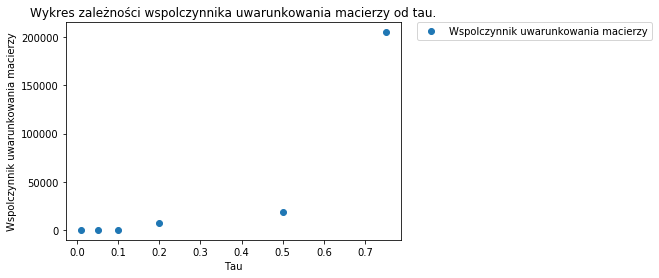

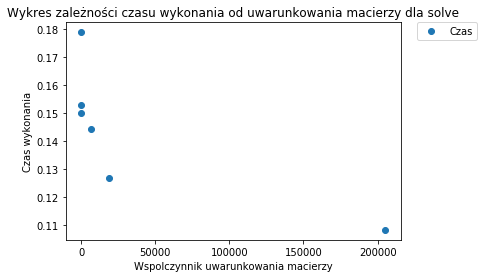

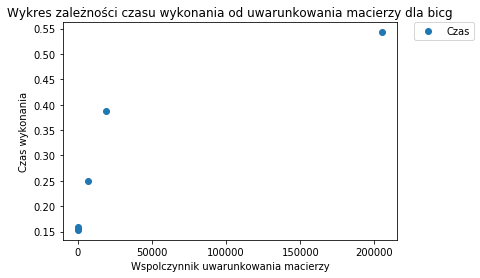

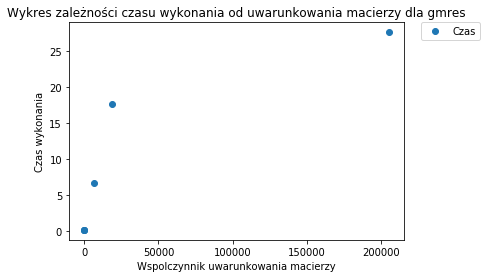

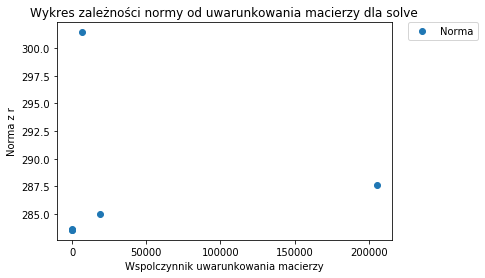

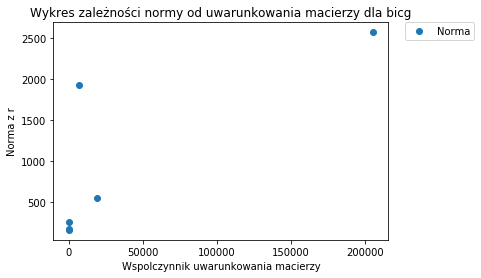

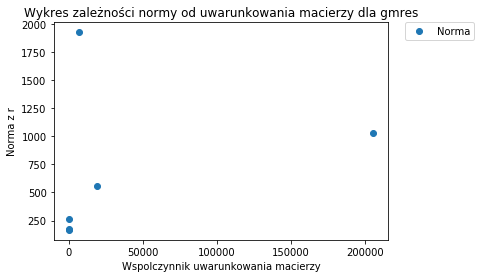

In [5]:
import matplotlib.pyplot as plt
import scipy.sparse.linalg as ssl
from scipy.sparse import csr_matrix
A = np.ones((500,500))

for j in range(0,500):
    for i in range(0,j):
        if(i!=j):
            A[i][j] = np.random.uniform(-1.0,1.0)
            A[j][i] = A[i][j]

print(A)

b=[]
for i in range(500):
    b.append(np.random.uniform(-1.0,1.0))

tau=[0.01, 0.05, 0.1, 0.2, 0.5, 0.75]

def zastap_zerem_wieksze_odtau(macierz, tau):
    ret=macierz.copy()
    for i in range(500):
        for j in range(500):
            if(i!=j and abs(macierz[i][j])>tau):
                ret[i][j]=0
    return ret

def wsk_uwar_mac(macierz):
    return LA.cond(macierz,np.inf)

wspolczynniki=[]
for i in range(len(tau)):
    wspolczynniki.append(wsk_uwar_mac(zastap_zerem_wieksze_odtau(A, tau[i])))
    

plt.plot(tau,wspolczynniki, 'o', label="Wspolczynnik uwarunkowania macierzy")

plt.title('Wykres zależności wspolczynnika uwarunkowania macierzy od tau.')
plt.ylabel('Wspolczynnik uwarunkowania macierzy')
plt.xlabel('Tau')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()  

# Im wieksze tau tym wiekszy wspolczynnik uwarunkowania macierzy. 

#Rozwiazanie z solve: 
x1=[]
time1=[]
norm1=[]
for i in range(len(tau)):
    start = time.perf_counter() 
    x1.append(np.linalg.solve(zastap_zerem_wieksze_odtau(A, tau[i]), b))
    elapsed = time.perf_counter()
    elapsed = elapsed - start
    time1.append(elapsed)
    norm1.append(LA.norm(np.subtract(b,np.dot(A,x1[i][0])),2))

#Rozwiazanie z bicg: 
x2=[]
time2=[]
norm2=[]
for i in range(len(tau)):
    start = time.perf_counter() 
    x2.append(ssl.bicg(csr_matrix(zastap_zerem_wieksze_odtau(A, tau[i])), b))
    elapsed = time.perf_counter()
    elapsed = elapsed - start
    time2.append(elapsed)
    norm2.append(LA.norm(np.subtract(b,np.dot(A,x2[i][0].tolist())),2))
    
#Rozwiazanie z gmres: 
x3=[]
time3=[]
norm3=[]
for i in range(len(tau)):
    start = time.perf_counter() 
    x3.append(ssl.gmres(csr_matrix(zastap_zerem_wieksze_odtau(A, tau[i])), b))
    elapsed = time.perf_counter()
    elapsed = elapsed - start
    time3.append(elapsed)
    norm3.append(LA.norm(np.subtract(b,np.dot(A,x3[i][0])),2))

    
    
plt.plot(wspolczynniki, time1, 'o', label="Czas")

plt.title('Wykres zależności czasu wykonania od uwarunkowania macierzy dla solve')
plt.ylabel('Czas wykonania')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

plt.plot(wspolczynniki, time2, 'o', label="Czas")

plt.title('Wykres zależności czasu wykonania od uwarunkowania macierzy dla bicg')
plt.ylabel('Czas wykonania')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

plt.plot(wspolczynniki, time3, 'o', label="Czas")

plt.title('Wykres zależności czasu wykonania od uwarunkowania macierzy dla gmres')
plt.ylabel('Czas wykonania')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 


#norma z r gdzie r zdefiniowane jest jako r=b-Ax (tzw. residuum) używam normy spektralnej (tzw. norma druga)

plt.plot(wspolczynniki, norm1, 'o', label="Norma")

plt.title('Wykres zależności normy od uwarunkowania macierzy dla solve')
plt.ylabel('Norma z r')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

plt.plot(wspolczynniki, norm2, 'o', label="Norma")

plt.title('Wykres zależności normy od uwarunkowania macierzy dla bicg')
plt.ylabel('Norma z r')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

plt.plot(wspolczynniki, norm3, 'o', label="Norma")

plt.title('Wykres zależności normy od uwarunkowania macierzy dla gmres')
plt.ylabel('Norma z r')
plt.xlabel('Wspolczynnik uwarunkowania macierzy')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 

Wnioski:<br>
1. Im wieksze tau tym wiekszy wspolczynnik uwarunkowania macierzy. 
2. Im większy współczynnik uwarunkowania macierzy tym większy czas wykonania obliczeń.
3. Zazwyczaj im większy współczynnik uwarunkowania macierzy tym większa norma z residuum. Czyli uwarunkowanie macierzy ma wpływ na jakość jej rozwiązania. Im większe uwarunkowanie macierzy tym gorsza jakość wyniku. 

***Zadanie 5***<br>


In [8]:
def Gauss_Seidel(A,b,epsilon):
    
    L=np.tril(A, -1)
    D=np.subtract(np.tril(A,0), L)
    U=np.subtract(A, np.tril(A,0))
    
    if(max(abs(np.linalg.eig(np.dot((np.dot((LA.inv(np.add(L,D))),-1)),U))[0]))>=1):
        return "Error"
    
    x0=[]
    for i in range(len(A[0])):
        x0.append(0)
        
    warunek=True
    
    
    while(warunek):
        
        x=np.add(np.dot(np.dot(np.dot(LA.inv(np.add(L,D)),U),-1),x0),np.dot(LA.inv(np.add(L,D)),b))
        
        if(LA.norm(np.subtract(x,x0),1)<epsilon):
            warunek=False
        
        for i in range(len(x)):
            x0[i]=x[i]
    
    return x

#Mamy rozwiazanie, bo promien spektralny jest mniejszy od 1. 
A=[[0.9,0,0], [0,0.8,0], [0,0,0.7]]
b=[1,2,0]
print(Gauss_Seidel(A,b,0.1))
print(np.linalg.solve(A, b))

#Norma z r gdzie r zdefiniowane jest jako r=b-Ax (tzw. residuum). Wynik 0.0 wiec rozwiazanie dokladne. 
print(LA.norm(np.subtract(b,np.dot(A,Gauss_Seidel(A,b,0.1)))))
    
#Promien spektralny wiekszy lub równy 1 czyli error, jakość rozwiązania w tym przypadku oceniam na bardzo dobrą, ponieważ właśnie taki powinien być wynik  
A=[[1,2,3], [2,1,3], [3,2,1]]
b=[1,2,0]
print(Gauss_Seidel(A,b,1))

[1.11111111 2.5        0.        ]
[1.11111111 2.5        0.        ]
0.0
Error
